In [47]:
import numpy as np
import math
from statsmodels.distributions.empirical_distribution import ECDF
import texttable as ttable
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import chi2
from scipy import stats


In [48]:
def get_bounds(mean, deviation):
    coef_mtrx = np.array([[1, 1], [1, -1]])
    free_el_vector = np.array([2 * mean, math.pow((12 * deviation), 1 / 2)])
    result = np.linalg.solve(coef_mtrx, free_el_vector)
    return result[1], result[0]


def g(y):
    return math.atan(y)


def cdf_y(y):
    return math.tan(y) / 18 + 0.32

def pdf_y(y):
    return 1 / (18 * math.pow(math.cos(y), 2))

def get_x_var_series(a, b, n=100):
    random_dist_nums = np.linspace(0, 1, n)
    x_variations = [i * (b - a) + a for i in random_dist_nums]
    x_variations.sort()
    return x_variations


def get_y_var_series(x_series):
    result = [g(x) for x in x_series]
    result.sort
    return result


def print_cdf_table(cdf):
    table = ttable.Texttable()
    table.header(['x', 'F(x)'])
    for i in range(len(cdf.x)):
        table.add_row([cdf.x[i], cdf.y[i]])
        
    print(table.draw())


def show_cdf_plot(x_1, p_1):
    plt.plot(x, p)
    plt.ylabel('P(x)')
    plt.xlabel('x')
    plt.show()



In [49]:
a, b = get_bounds(2, 27)
x_series = get_x_var_series(a, b)
y_series = get_y_var_series(x_series)


In [50]:
def count_in_bounds(arr, a, b):
    return len([i for i in arr if (a <= i and i <= b)])


def get_equal_interv_series(bounds, n, arr):
    intervals = np.linspace(*bounds, n)
    frequencies = [count_in_bounds(arr, intervals[i-1], intervals[i]) for i in range(1, len(intervals))]
    return intervals, [0, *frequencies] 

def prepare_for_ecdf(values, frequencies): 
    result = []
    for i in range(len(values)):
        result += [values[i]] * frequencies[i]
        
    return result

In [51]:
n = 100

def get_ecdf_p(v, ecdf):
    for i in range(len(ecdf.x)):
        if ecdf.x[i] > v:
            return ecdf.y[i]
        
    return 1

def get_amount_in_bounds(a, b, arr):
    return len([i for i in arr if (a <= i and i <= b)])

def get_eq_int_intervals(bounds, n):
    linspace = np.linspace(*bounds, n)
    return [(linspace[i-1], linspace[i]) for i in range(1, len(linspace))]

def get_eq_int_hist_data(series, bounds, n):
    intervals = get_eq_int_intervals(bounds, n)
    amount = len(series)
    step = intervals[0][1] - intervals[0][0]
    height = [get_amount_in_bounds(*i, series) / (amount * step) for i in intervals]
    return intervals, height

def plot_eq_int_hist(series, bounds, n):
    intervals, heights = get_eq_int_hist_data(series, bounds, n)
    intervals_bounds = [i[1] for i in intervals]
    plt.plot(intervals_bounds, heights, drawstyle="steps")
    plt.fill_between(intervals_bounds, heights,  step="pre", alpha=0.4)

def plot_eq_int_polygon(series, bounds, n):
    bounds = (-1.45, 1.47)
    intervals, heights = get_eq_int_hist_data(series, bounds, n)
    polygon_x = [(a + b) / 2 for a, b in intervals]
    plt.plot(polygon_x, heights)

def plot_pdf():
    l = np.linspace(-1.42, 1.47, 100)
    plt.plot(l, [pdf_y(i) for i in l])

def plot__emp_pdf(series, bounds, n, int_height_method):
    intervals, heights = int_height_method(series, bounds, n)
    intervals_x = [i[1] for i in intervals]
    bounds = (-1.42, 1.47)
    ecdf = ECDF(series)
    p = [get_ecdf_p(v, ecdf) for v in intervals_x]
    plt.plot(intervals_x, p)
    

def count_n(len_):
    if len_ < 100:
        return int(math.pow(len_, (1/2)))
    
    return int(3 * math.log(len_, 10))

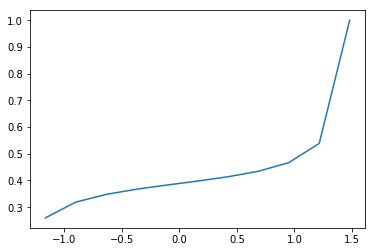

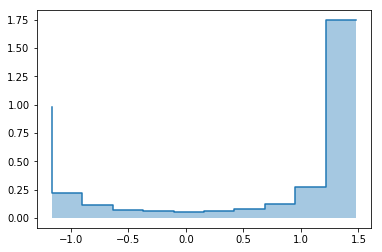

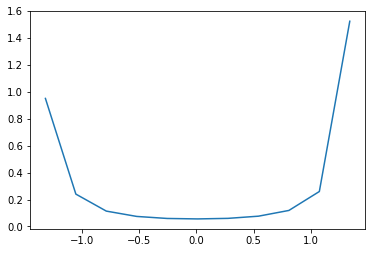

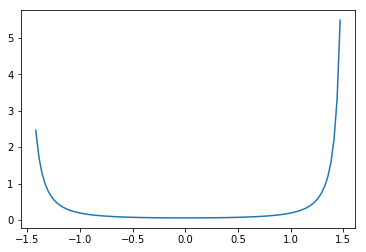

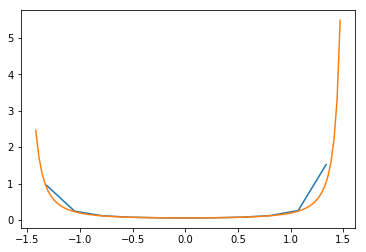

In [52]:
a, b = get_bounds(2, 27)
bounds = g(a), g(b)
x_series = get_x_var_series(a, b, 10000)
y_series = get_y_var_series(x_series)
n = count_n(len(y_series))

plot__emp_pdf(y_series, bounds, n, get_eq_int_hist_data)
plt.show()

plot_eq_int_hist(y_series, bounds, n)
plt.show()

plot_eq_int_polygon(y_series, bounds, n)
plt.show()

plot_pdf()
plt.show()

plot_eq_int_polygon(y_series, bounds, n)
plot_pdf()
plt.show()

In [53]:
def get_eq_pr_intervals(series, amount_of_steps):
    step_size = len(series) // amount_of_steps
    intervals = []
    for i in range(1, amount_of_steps):
        intervals.append((series[(i-1)*step_size-1], series[i*step_size-1]))
        
    return intervals

def get_eq_pr_hist_data(series, bounds, n):
    intervals = get_eq_pr_intervals(series, n)
    amount = len(series)
    height = []
    for i in intervals:
        step = i[1]-i[0]
        height.append(get_amount_in_bounds(*i, series) / (amount * step))
     
    return intervals, height

def plot_eq_pr_hist(series, bounds, n):
    intervals, heights = get_eq_pr_hist_data(series, bounds, n)
    intervals_bounds = [i[1] for i in intervals]
    plt.plot(intervals_bounds, heights, drawstyle="steps")
    plt.fill_between(intervals_bounds, heights,  step="pre", alpha=0.4)

def plot_eq_pr_polygon(series, bounds, n):
    intervals, heights = get_eq_pr_hist_data(series, bounds, n)
    heights[0] = 2.5
    polygon_x = [x[1] for x in intervals]
    plt.plot(polygon_x, heights)


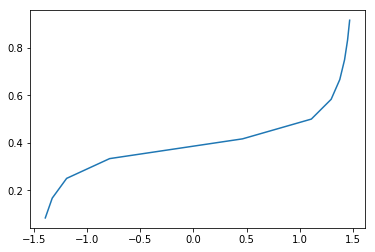

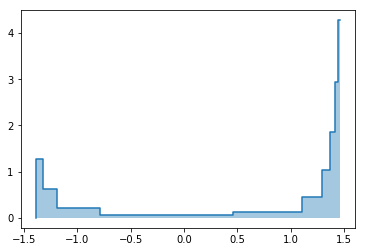

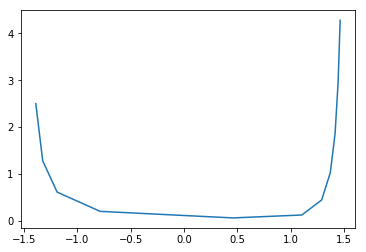

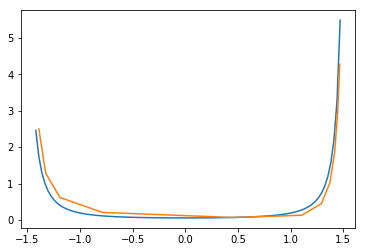

In [54]:
a, b = get_bounds(2, 27)
x_series = get_x_var_series(a, b, 10000)
y_series = get_y_var_series(x_series)
y_series.sort()
n = count_n(len(y_series))



plot__emp_pdf(y_series, bounds, n, get_eq_pr_hist_data)
plt.show()

plot_eq_pr_hist(y_series, bounds, n)
plt.show()

plot_eq_pr_polygon(y_series, bounds, n)
plt.show()

plot_pdf()
plot_eq_pr_polygon(y_series, bounds, n)
plt.show()

In [55]:
intervals, heights = get_eq_pr_hist_data(y_series, bounds, 10)
print(heights)

[-0.0, 1.0426399061278748, 0.36759747939169063, 0.08280203008699287, 0.10992608909237521, 0.4848459443010566, 1.2412453536336032, 2.360980056539897, 3.841842554333629]


In [56]:
def count_getting_in_interval_p(interval, cdf=cdf_y):
    return cdf(interval[1]) - cdf(interval[0])

def get_p_sequences(intervals, series):
    tp_of_getting_in_intervals = [count_getting_in_interval_p(i) for i in intervals]
    ep_of_getting_in_intervals = [get_amount_in_bounds(*i, series) / n for i in intervals]
    p = tp_of_getting_in_intervals[1] 
    tp_of_getting_in_intervals[0], ep_of_getting_in_intervals[0] = p, p
    return tp_of_getting_in_intervals, ep_of_getting_in_intervals

def count_x_2(tp_of_getting_in_intervals, ep_of_getting_in_intervals, n):
    result = 0
    for i in range(len(tp_of_getting_in_intervals)):
        p_i, empiric_p_i = tp_of_getting_in_intervals[i], ep_of_getting_in_intervals[i]
        result += math.pow(p_i - empiric_p_i, 2) / p_i
    return result * n

def invoke_pirson_criteria_check(series, bounds, step_size, a):
    intervals, heights = get_eq_pr_hist_data(y_series, bounds, step_size)
    tp_of_getting_in_intervals, ep_of_getting_in_intervals = get_p_sequences(intervals, y_series)
    x_2 = count_x_2(tp_of_getting_in_intervals, ep_of_getting_in_intervals, len(series))
    fpow = len(intervals) - 1 
    chi_isf = chi2.isf(a, fpow)

    print('a=', a, '; chi2_isf=', chi_isf, '; k=', fpow, sep='')
    print('result: ', x_2)
    

a, b = get_bounds(2, 27)
bounds = a, b
n = 200
step_size = int(n / count_n(len(y_series)))
x_series = get_x_var_series(*bounds, n)
y_series = get_y_var_series(x_series)
y_series.sort()

invoke_pirson_criteria_check(y_series, bounds, step_size, 0.01)    

a=0.01; chi2_isf=29.141237740672796; k=14
result:  1.025054438860962


In [57]:
a, b = get_bounds(2, 27)
bounds = a, b
n = 30
lambda_critics = 1.63

x_series = get_x_var_series(*bounds, n)
y_series = get_y_var_series(x_series)
y_series.sort()
ecdf_x = ECDF(y_series).x[1:]
ecdf_y = ECDF(y_series).y[1:]
tcdf_y = [cdf_y(i) for i in ecdf_x] 

print('a=0.001; lambda=', lambda_critics)
print('result: ', stats.kstest(y_series, lambda arr: [cdf_y(y) for y in arr]).statistic)

a=0.001; lambda= 1.63
result:  0.10222222222222238


In [67]:
a, b = get_bounds(2, 27)
bounds = a, b
n = 30
x_series = get_x_var_series(*bounds, n)
y_series = get_y_var_series(x_series)
y_series.sort()

def get_mizes_x(series):
    n = len(series)
    ecdf = ECDF(series)
    result = 0
    for i in range(n):
        result += math.pow(get_ecdf_p(series[i], ecdf) - ((i - 0.5) / n), 2)
    
    return result + (1 / (12 * n))


print('a = ', 0.09, 'criteria = 0.744')
print('result: ', get_mizes_x(y_series))

a =  0.09 criteria = 0.744
result:  0.20666666666666655


In [59]:
def t_y(y, n):
    dict_ = {
    (20, 0.95): 2.093,
    (30, 0.95): 2.045,
    (50, 0.95): 2.009,
    (70, 0.95): 1.996,
    (100,0.95): 1.984,
    (150,0.95): 1.960,
    (20, 0.99): 2.861,
    (30, 0.99): 2.756,
    (50, 0.99): 2.679,
    (70, 0.99): 2.649,
    (100, 0.99): 2.627,
    (150, 0.99): 2.576
    }
    
    return dict_[(n, y)]


def estimate_em_interval_without_sd(emean, s, y, n):
    delta = t_y(y, n)
    left_bound = emean - ((delta * s) / math.pow(n, 1/2))
    right_bound = emean + ((delta * s) / math.pow(n, 1/2))
    return left_bound, right_bound

def invoke_em_estimation_without_sd(emean, s, n, significance_levels):
    intervals = [estimate_em_interval_without_sd(emean, s, 1 - a, n) for a in significance_levels]
    lens = [i[1] - i[0] for i in intervals]
    
    for i in range(0, len(significance_levels)):
        print(significance_levels[i], intervals[i])
    
    plt.plot(significance_levels, lens)
    plt.ylabel('Length')
    plt.xlabel('a')
    plt.title('len = f(a)')
    plt.show()


In [60]:
def get_laplas_param(y):
    dict_ = {0.99: 2.5, 0.95: 1.8}
    return dict_[y]


def estimate_em_interval_with_sd(emean, y, n, sd):
    left_bound = emean - get_laplas_param(y) * sd / math.pow(n, 1 / 2)
    right_bound = emean + get_laplas_param(y) * sd / math.pow(n, 1 / 2)
    return left_bound, right_bound

def invoke_em_estimation_with_sd(emean, n, sd, significance_levels):
    intervals = [estimate_em_interval_with_sd(emean, 1 - a, n, sd) for a in significance_levels]
    lens = [i[1] - i[0] for i in intervals]
    
    for i in range(0, len(significance_levels)):
        print(significance_levels[i], intervals[i])
    
    plt.plot(significance_levels, lens)
    plt.ylabel('Length')
    plt.xlabel('a')
    plt.title('len = f(a)')
    plt.show()

n= 20
wihtout sd estimation
0.01 (-0.5211091518970096, 1.1392208670811086)
0.05 (-0.2982616414854061, 0.9163733566695053)


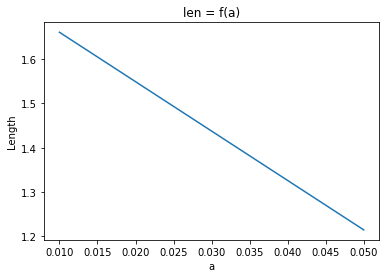

with sd estimation
0.01 (-0.3755973392894081, 0.9937090544735072)
0.05 (-0.18389444416259992, 0.802006159346699)


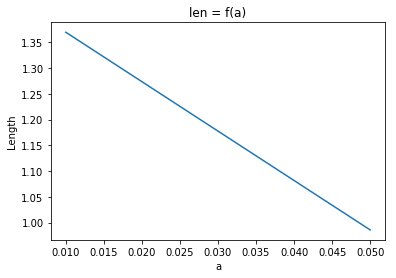

n= 30
wihtout sd estimation
0.01 (-0.3249970866338981, 0.9531913291874181)
0.05 (-0.16012191180643887, 0.7883161543599588)


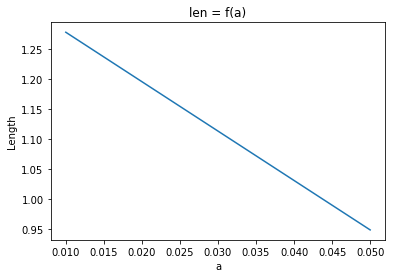

with sd estimation
0.01 (-0.24491987309818747, 0.8731141156517075)
0.05 (-0.08839511467320216, 0.7165893572267221)


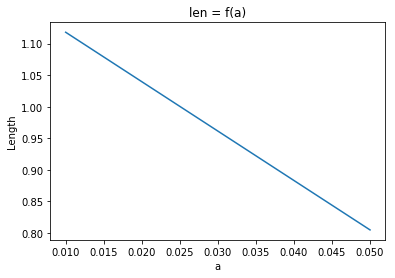

n= 50
wihtout sd estimation
0.01 (-0.1550489101714505, 0.7912306244914101)
0.05 (-0.03671981569139893, 0.6729015300113586)


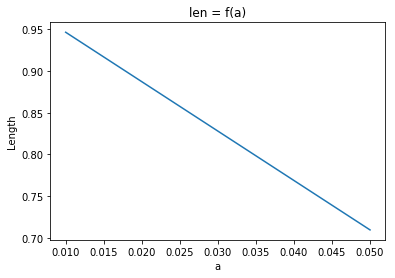

with sd estimation
0.01 (-0.11492184473223949, 0.751103559052199)
0.05 (0.006321711797581897, 0.6298600025223777)


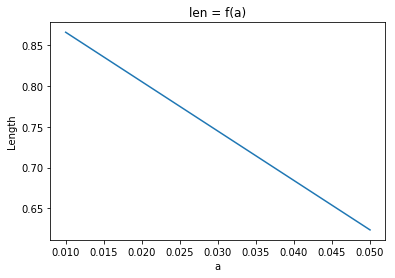

n= 70
wihtout sd estimation
0.01 (-0.07276368431496716, 0.7123633565688356)
0.05 (0.02400640962559969, 0.6155932626282687)


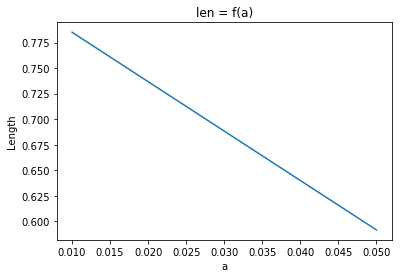

with sd estimation
0.01 (-0.046162691228765707, 0.6857623634826342)
0.05 (0.0563068164308303, 0.5832928558230381)


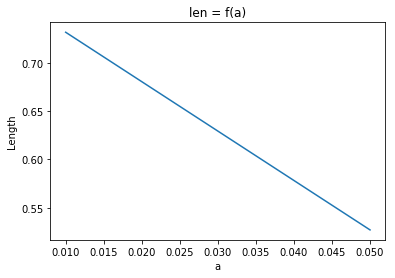

n= 100
wihtout sd estimation
0.01 (-0.0028873826604911557, 0.6450489380670256)
0.05 (0.07640897330216456, 0.5657525821043698)


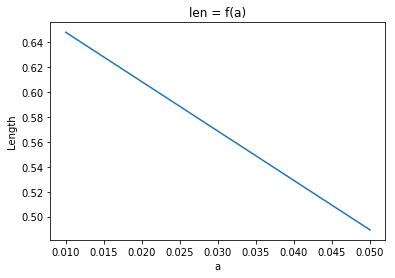

with sd estimation
0.01 (0.014894559855369971, 0.6272669955511645)
0.05 (0.10062670085278116, 0.5415348545537533)


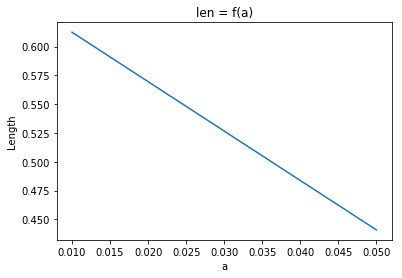

n= 150
wihtout sd estimation
0.01 (0.06377224248485247, 0.5803809615258857)
0.05 (0.1255406762832369, 0.5186125277275013)


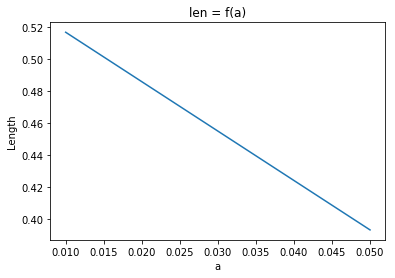

with sd estimation
0.01 (0.07207660200536908, 0.5720766020053691)
0.05 (0.14207660200536906, 0.5020766020053691)


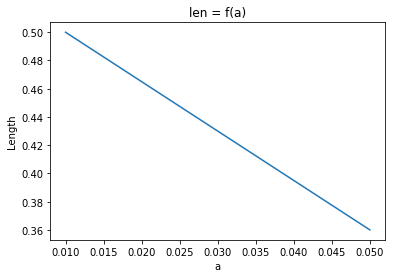

In [61]:
def invoke_mean_estimation(n):
    a, b = get_bounds(2, 27)
    bounds = a, b
    mean = 0.355
    dispersion = 1.5
    sd = math.pow(dispersion, 1 / 2)
    s = (n / (n-1)) * dispersion

    x_series = get_x_var_series(*bounds, n)
    y_series = get_y_var_series(x_series)
    y_series.sort()
    emean = np.array(y_series).mean()
    edispersion = np.array(y_series).std()
    s = (n / (n - 1)) * edispersion 
    
    significance_levels = [0.01, 0.05]
    print('n=', n)
    print('wihtout sd estimation')
    invoke_em_estimation_without_sd(emean, s, n, significance_levels)
    print('with sd estimation')
    invoke_em_estimation_with_sd(emean, n, sd, significance_levels)

    
for n in [20, 30, 50, 70, 100, 150]:
    invoke_mean_estimation(n)

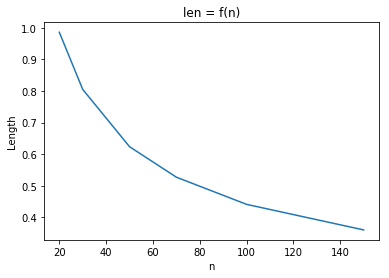

In [62]:
def count_amount_interval_len(n):
    a, b = get_bounds(2, 27)
    bounds = a, b
    mean = 0.355
    dispersion = 1.5
    sd = math.pow(dispersion, 1 / 2)
    s = (n / (n-1)) * dispersion

    x_series = get_x_var_series(*bounds, n)
    y_series = get_y_var_series(x_series)
    y_series.sort()
    emean = np.array(y_series).mean()
    edispersion = np.array(y_series).std()
    s = (n / (n - 1)) * edispersion 
    
    l, r = estimate_em_interval_with_sd(emean, 0.95, n, sd)
    return r - l
    
amounts = [20, 30, 50, 70, 100, 150]
lens = [count_amount_interval_len(n) for n in amounts]
plt.plot(amounts, lens)
plt.ylabel('Length')
plt.xlabel('n')
plt.title('len = f(n)')
plt.show()

In [63]:
a, b = get_bounds(2, 27)
bounds = a, b
mean = 0.355
dispersion = 1.5
sd = math.pow(dispersion, 1 / 2)
s = (n / (n-1)) * dispersion

x_series = get_x_var_series(*bounds, n)
y_series = get_y_var_series(x_series)
y_series.sort()
emean = np.array(y_series).mean()
edispersion = np.array(y_series).std()
s = (n / (n - 1)) * edispersion 

y = 0.95

def estimate_dispersion_intervals_without_mean(s, n, y):
    left_bound = (n - 1) * math.pow(s, 2) / chi2.ppf((1 + y) / 2, n-1)
    right_bound = (n - 1) * math.pow(s, 2) / chi2.ppf((1 - y) / 2, n-1)
    return left_bound, right_bound

def invoke_dispersion_estimation_without_mean(s, n, significance_levels):
    intervals = [estimate_dispersion_intervals_without_mean(s, n, 1 - a) for a in significance_levels]
    lens = [i[1] - i[0] for i in intervals]
    
    for i in range(0, len(significance_levels)):
        print(significance_levels[i], intervals[i])
    
    plt.plot(significance_levels, lens)
    plt.ylabel('Length')
    plt.xlabel('a')
    plt.title('len = f(a)')
    plt.show()


def estimate_dispersion_intervals_with_mean(y_series, mean, y):
    sum_ = 0
    n = len(y_series)
    for i in range(n):
        sum_ += math.pow(y_series[i] - mean, 2)
    
    left_bound = sum_ / chi2.ppf((1 + y) / 2, n-1)
    right_bound = sum_ / chi2.ppf((1 - y) / 2, n-1)
    
    return left_bound, right_bound

def invoke_dispersion_estimation_with_mean(y_series, mean, significance_levels):
    intervals = [estimate_dispersion_intervals_with_mean(y_series, mean, 1 - a) for a in significance_levels]
    lens = [i[1] - i[0] for i in intervals]
    
    for i in range(0, len(significance_levels)):
        print(significance_levels[i], intervals[i])
    
    plt.plot(significance_levels, lens)
    plt.ylabel('Length')
    plt.xlabel('a')
    plt.title('len = f(a)')
    plt.show()
    

n= 20
wihtout mean estimation
0.01 (0.7888882907195687, 4.447284835738835)
0.05 (0.9264820283150993, 3.417395621203887)


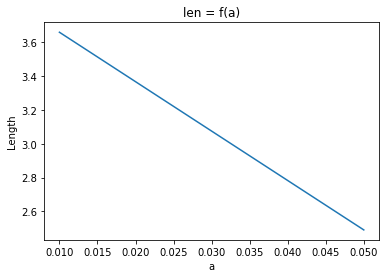

with mean estimation
0.01 (0.7888882907195687, 4.447284835738835)
0.05 (0.9264820283150993, 3.417395621203887)


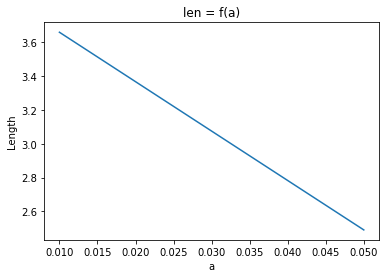

n= 30
wihtout mean estimation
0.01 (0.8650709116500602, 3.450461615551732)
0.05 (0.990195914170877, 2.8213259994920947)


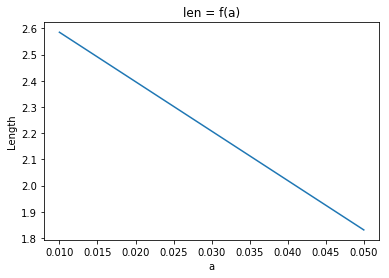

with mean estimation
0.01 (0.8650709116500602, 3.450461615551732)
0.05 (0.990195914170877, 2.8213259994920947)


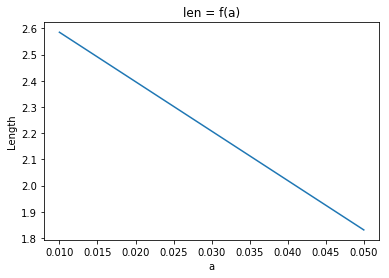

n= 50
wihtout mean estimation
0.01 (0.9581713822807628, 2.7508336258914623)
0.05 (1.0674430270516335, 2.3754911787806647)


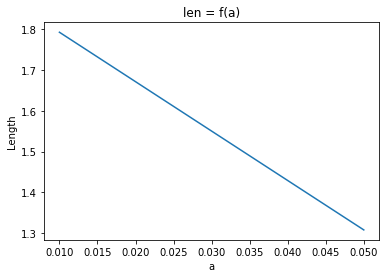

with mean estimation
0.01 (0.9581713822807628, 2.7508336258914623)
0.05 (1.0674430270516335, 2.3754911787806647)


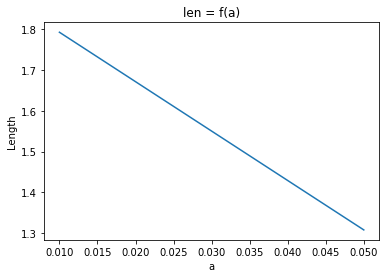

n= 70
wihtout mean estimation
0.01 (1.015998381185706, 2.4625861409996137)
0.05 (1.1149362458412337, 2.183532814390018)


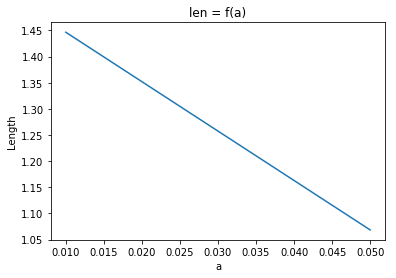

with mean estimation
0.01 (1.015998381185706, 2.4625861409996137)
0.05 (1.1149362458412337, 2.183532814390018)


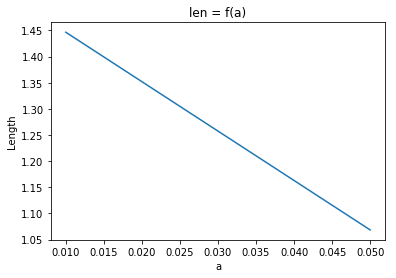

n= 100
wihtout mean estimation
0.01 (1.0732885169777815, 2.242860960944446)
0.05 (1.1615839332879383, 2.0334067914569065)


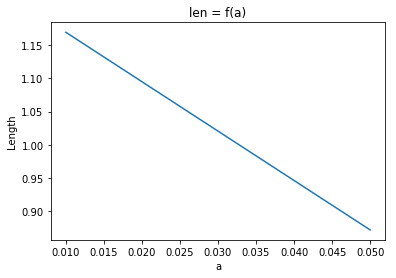

with mean estimation
0.01 (1.0732885169777815, 2.242860960944446)
0.05 (1.1615839332879383, 2.0334067914569065)


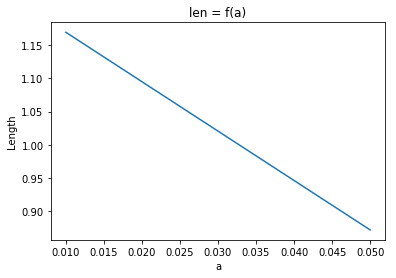

n= 150
wihtout mean estimation
0.01 (1.132736657953685, 2.0628486652529396)
0.05 (1.2095512807514721, 1.9077044490312458)


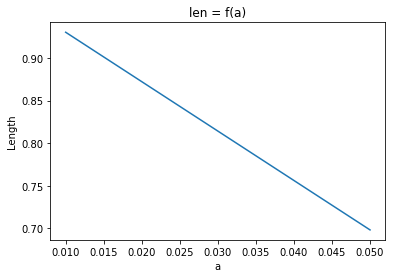

with mean estimation
0.01 (1.132736657953685, 2.0628486652529396)
0.05 (1.2095512807514721, 1.9077044490312458)


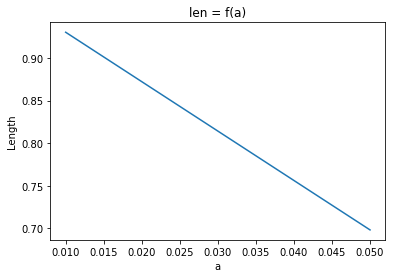

In [64]:
def invoke_dispersion_estimation(n):
    a, b = get_bounds(2, 27)
    bounds = a, b
    mean = 0.355
    dispersion = 1.5
    sd = math.pow(dispersion, 1 / 2)
    s = (n / (n-1)) * dispersion

    x_series = get_x_var_series(*bounds, n)
    y_series = get_y_var_series(x_series)
    y_series.sort()
    emean = np.array(y_series).mean()
    edispersion = np.array(y_series).std()
    s = (n / (n - 1)) * edispersion 
    
    significance_levels = [0.01, 0.05]
    print('n=', n)
    print('wihtout mean estimation')
    invoke_dispersion_estimation_with_sd(y_series, mean, significance_levels)
    print('with mean estimation')
    invoke_dispersion_estimation_with_mean(y_series, mean, significance_levels)
    
for n in [20, 30, 50, 70, 100, 150]:
    invoke_dispersion_estimation(n)

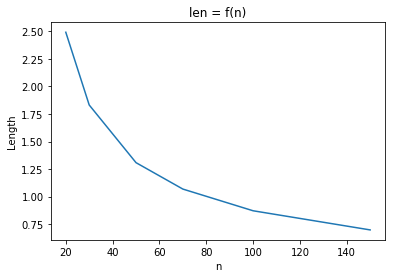

In [65]:
def count_amount_disp_interval_len(n):
    a, b = get_bounds(2, 27)
    bounds = a, b
    mean = 0.355
    dispersion = 1.5
    sd = math.pow(dispersion, 1 / 2)
    s = (n / (n-1)) * dispersion

    x_series = get_x_var_series(*bounds, n)
    y_series = get_y_var_series(x_series)
    y_series.sort()
    emean = np.array(y_series).mean()
    edispersion = np.array(y_series).std()
    s = (n / (n - 1)) * edispersion 
    
    l, r =  estimate_dispersion_intervals_with_mean(y_series, mean, 0.95)
    return r - l
    
amounts = [20, 30, 50, 70, 100, 150]
lens = [count_amount_disp_interval_len(n) for n in amounts]
plt.plot(amounts, lens)
plt.ylabel('Length')
plt.xlabel('n')
plt.title('len = f(n)')
plt.show()

In [66]:
estimate_dispersion_intervals_with_mean(y_series, mean, 0.95)

(1.2095512807514721, 1.9077044490312458)